<a href="https://colab.research.google.com/github/quantum-intelligence/computational-physics/blob/main/CP_Lecture_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Physics
## Lectuer 17
### Fourier Transform

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from scipy.fft import fft, ifft
%matplotlib inline
import pandas_datareader.data as web
import datetime as dt

### QUESTIONS
Create a synthetid data set comprising a sum of sine functions.
- Do an FFT analysis for 1 sine function
- Do an FFT analysis for 1 sine function + constant
- Consider 5 sine functions (with frequencies 1,2,3,4,5)
- Vary the sampling rate and/or step size to test the Nyquist frequency. What is the role of aliasing in your analysis?

### Consider real world data
- We will use stock market data which can seem periodic at times

In [7]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

In [19]:
df = web.DataReader("TSLA", 'yahoo', start, end) #Tesla
df2 = web.DataReader("SPY", 'yahoo', start, end) #SP500 index

In [20]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001


In [29]:
# assume time steps of one day and no weekends
t =  np.arange(len(df))
price = df['Close']; price = np.asarray(price)

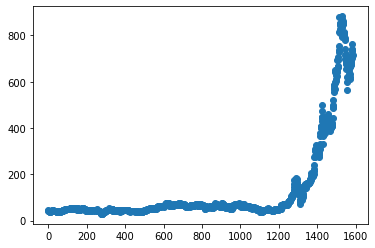

In [30]:
#plot price data over a number of days
plt.scatter(t,price)
plt.xlabel('day')
plt.ylabel('price')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


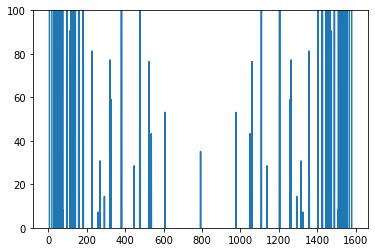

In [37]:
price_fft = fft(price)
freq = np.arange(len(price_fft)) #CHECK RANGE
plt.plot(freq, price_fft)
plt.ylim(0,100)
plt.show()

In [31]:
### QUESTION:
- vary the window and repeat the analysis
- smooth data and repeat the analysis
- repeat the above for the SP500
- How could you use your analysis to predict the stock price?